### EXERCISE 05.1


In this exercise has been used the Metropolis algorithm to sample $|\Psi_{1,0,0}(x,y,z)|^2$ and $|\Psi_{2,1,0}(x,y,z)|^2$ **in Cartesian coordinates** using an uniform transition probability and a normal transational probability $T(\vec{x}|\vec{y})$. The data sampled has been used to estimate $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$. As usual, has been used data blocking and has been given an estimation of the statistical uncertainties.


In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
M=10000000
N=100
L=int(M/N)
x = np.arange(N) 
x*=L # Number of steps = block * (Number of steps in each block)

a_0=5.291777721092e-11


To calculate $\left\langle r \right\rangle$ for both the states |100> and |210> has been used the metropolis algorithm as requested. To extract a point $\vec{x}_{n}$ of the markov chain it has been used two different transational probability:

1. An uniform transational probablity around the point $\vec{x}_{n-1}$
$$
T_{\text{unif}}(\vec{x}_n | \vec{x}_{n-1}) = \frac{1}{V}
$$
Indeed, if we call L the edge of the cube, for every coordianate
$$
x_{(n-1)}-\frac{L}{2}<x_{n}<x_{(n-1)}+\frac{L}{2}
$$

2. A Gaussian probability distribution around the point $\vec{x}_{n-1}$
$$
T_{\text{Gauss}}(x_{n} | x_{n-1}) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x_{n}-x_{n-1})^2}{2\sigma^2}}
$$
for every coordiante of the points


The choice of the free parameters of T (i.e. the edge **L** for the case 1 and $\sigma$ for the case 2) have been chosen to respect the empirical rule, which states that for a good sampling the acceptance must be close to 50%.

In [2]:
data_a_100_gauss = np.loadtxt(fname = "data_a_100_gauss.txt")
data_a_100_unif = np.loadtxt(fname = "data_a_100_unif.txt")

In [3]:
data_a_210_gauss = np.loadtxt(fname = "data_a_210_gauss.txt")
data_a_210_unif = np.loadtxt(fname = "data_a_210_unif.txt")

In [4]:
ave_a_100_gauss_prog=[]
ave_a_100_unif_prog=[]
ave_a_210_gauss_prog=[]
ave_a_210_unif_prog=[]
for i in range(1,data_a_100_gauss.size):
    ave_a_100_gauss_prog.append(np.mean(data_a_100_gauss[:i]))
    ave_a_100_unif_prog.append(np.mean(data_a_100_unif[:i]))
    ave_a_210_unif_prog.append(np.mean(data_a_210_unif[:i]))
    ave_a_210_gauss_prog.append(np.mean(data_a_210_gauss[:i]))
    

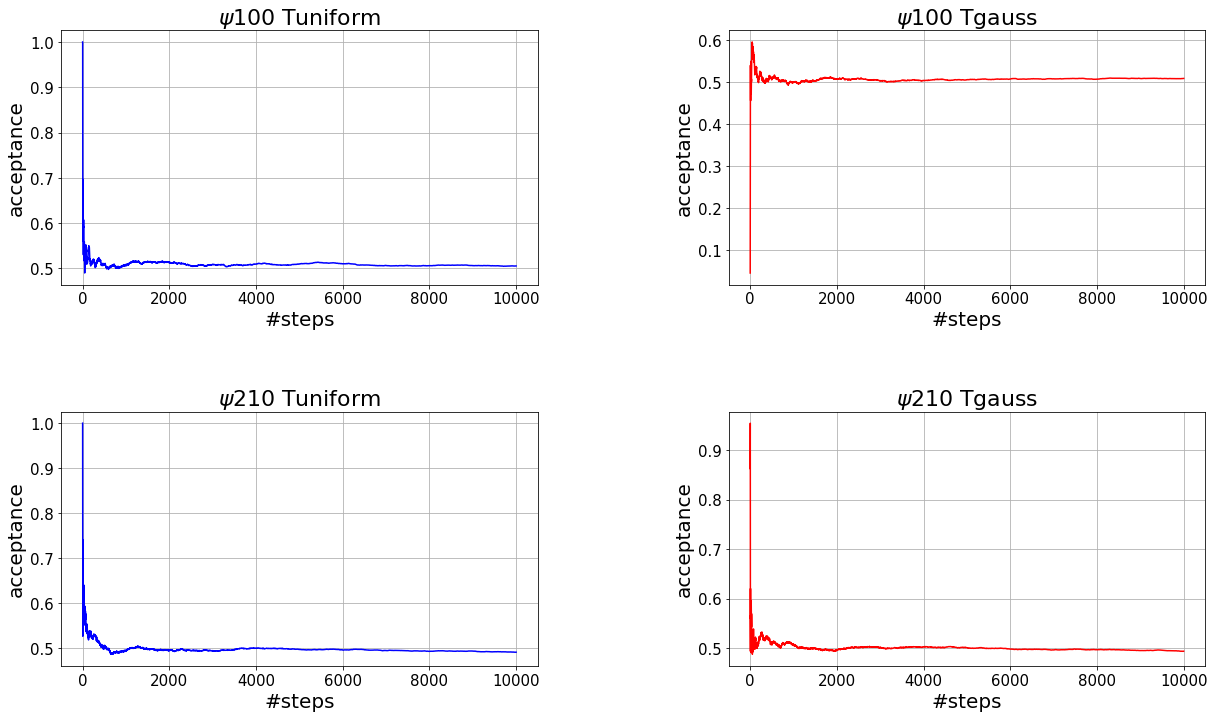

In [5]:
x_a=np.arange(np.asarray(ave_a_210_gauss_prog).size)
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(17, 12))

ax1.plot(x_a,ave_a_100_unif_prog, color='blue')
ax1.set_title(f'$\psi100$ Tuniform',  fontsize=22);
ax1.set_xlabel('#steps',fontsize=20)
ax1.set_ylabel('acceptance',fontsize=20)
ax1.tick_params(axis="x", labelsize=15)
ax1.tick_params(axis="y", labelsize=15)
ax1.grid(True)

ax2.plot(x_a,ave_a_100_gauss_prog, color='red')
ax2.set_title(f'$\psi100$ Tgauss',  fontsize=22);
ax2.set_xlabel('#steps',fontsize=20)
ax2.set_ylabel('acceptance',fontsize=20)
ax2.tick_params(axis="x", labelsize=15)
ax2.tick_params(axis="y", labelsize=15)
ax2.grid(True)

ax3.plot(x_a,ave_a_210_unif_prog, color='blue')
ax3.set_title(f'$\psi210$ Tuniform',  fontsize=22);
ax3.set_xlabel('#steps',fontsize=20)
ax3.set_ylabel('acceptance',fontsize=20)
ax3.tick_params(axis="x", labelsize=15)
ax3.tick_params(axis="y", labelsize=15)
ax3.grid(True)

ax4.plot(x_a,ave_a_210_gauss_prog, color='red')
ax4.set_title(f'$\psi210$ Tgauss',  fontsize=22);
ax4.set_xlabel('#steps',fontsize=20)
ax4.set_ylabel('acceptance',fontsize=20)
ax4.tick_params(axis="x", labelsize=15)
ax4.tick_params(axis="y", labelsize=15)
ax4.grid(True)


fig.tight_layout()
fig.subplots_adjust(top=0.8,hspace = 0.5,wspace = 0.4)

If the Markov chain starts near the point of maximum the acceptance converges fastly and the positions are not too correlated.

In [6]:
x_n_100_gauss = np.loadtxt(fname = "x_n_100_gauss.txt")
x_n_100_unif = np.loadtxt(fname = "x_n_100_unif.txt")

In [7]:
x_n_210_gauss = np.loadtxt(fname = "x_n_210_gauss.txt")
x_n_210_unif = np.loadtxt(fname = "x_n_210_unif.txt")

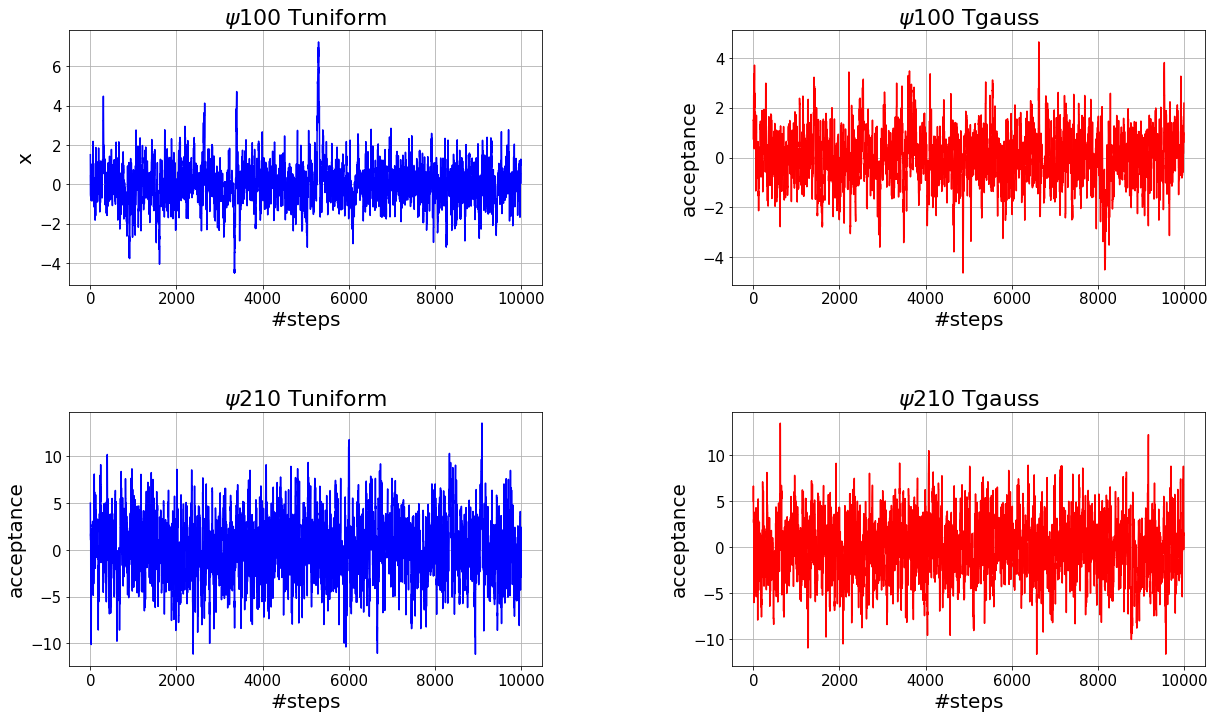

In [8]:
x_x=np.arange(np.asarray(x_n_210_gauss[:10000]).size)
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(17, 12))

ax1.plot(x_x,x_n_100_unif[:10000]/a_0, color='blue')
ax1.set_title(f'$\psi100$ Tuniform',  fontsize=22);
ax1.set_xlabel('#steps',fontsize=20)
ax1.set_ylabel('x',fontsize=20)
ax1.tick_params(axis="x", labelsize=15)
ax1.tick_params(axis="y", labelsize=15)
ax1.grid(True)

ax2.plot(x_x,x_n_100_gauss[:10000]/a_0, color='red')
ax2.set_title(f'$\psi100$ Tgauss',  fontsize=22);
ax2.set_xlabel('#steps',fontsize=20)
ax2.set_ylabel('acceptance',fontsize=20)
ax2.tick_params(axis="x", labelsize=15)
ax2.tick_params(axis="y", labelsize=15)
ax2.grid(True)

ax3.plot(x_x,x_n_210_unif[:10000]/a_0, color='blue')
ax3.set_title(f'$\psi210$ Tuniform',  fontsize=22);
ax3.set_xlabel('#steps',fontsize=20)
ax3.set_ylabel('acceptance',fontsize=20)
ax3.tick_params(axis="x", labelsize=15)
ax3.tick_params(axis="y", labelsize=15)
ax3.grid(True)

ax4.plot(x_x,x_n_210_gauss[:10000]/a_0, color='red')
ax4.set_title(f'$\psi210$ Tgauss',  fontsize=22);
ax4.set_xlabel('#steps',fontsize=20)
ax4.set_ylabel('acceptance',fontsize=20)
ax4.tick_params(axis="x", labelsize=15)
ax4.tick_params(axis="y", labelsize=15)
ax4.grid(True)


fig.tight_layout()
fig.subplots_adjust(top=0.8,hspace = 0.5,wspace = 0.4)

In [9]:
data_a_100_gauss = np.loadtxt(fname = "data_a_100_gauss_far.txt")
data_a_100_unif = np.loadtxt(fname = "data_a_100_unif_far.txt")

In [10]:
data_a_210_gauss = np.loadtxt(fname = "data_a_210_gauss_far.txt")
data_a_210_unif = np.loadtxt(fname = "data_a_210_unif_far.txt")

In [11]:
ave_a_100_gauss_prog=[]
ave_a_100_unif_prog=[]
ave_a_210_gauss_prog=[]
ave_a_210_unif_prog=[]
for i in range(1,data_a_100_gauss.size):
    ave_a_100_gauss_prog.append(np.mean(data_a_100_gauss[:i]))
    ave_a_100_unif_prog.append(np.mean(data_a_100_unif[:i]))
    ave_a_210_unif_prog.append(np.mean(data_a_210_unif[:i]))
    ave_a_210_gauss_prog.append(np.mean(data_a_210_gauss[:i]))
    

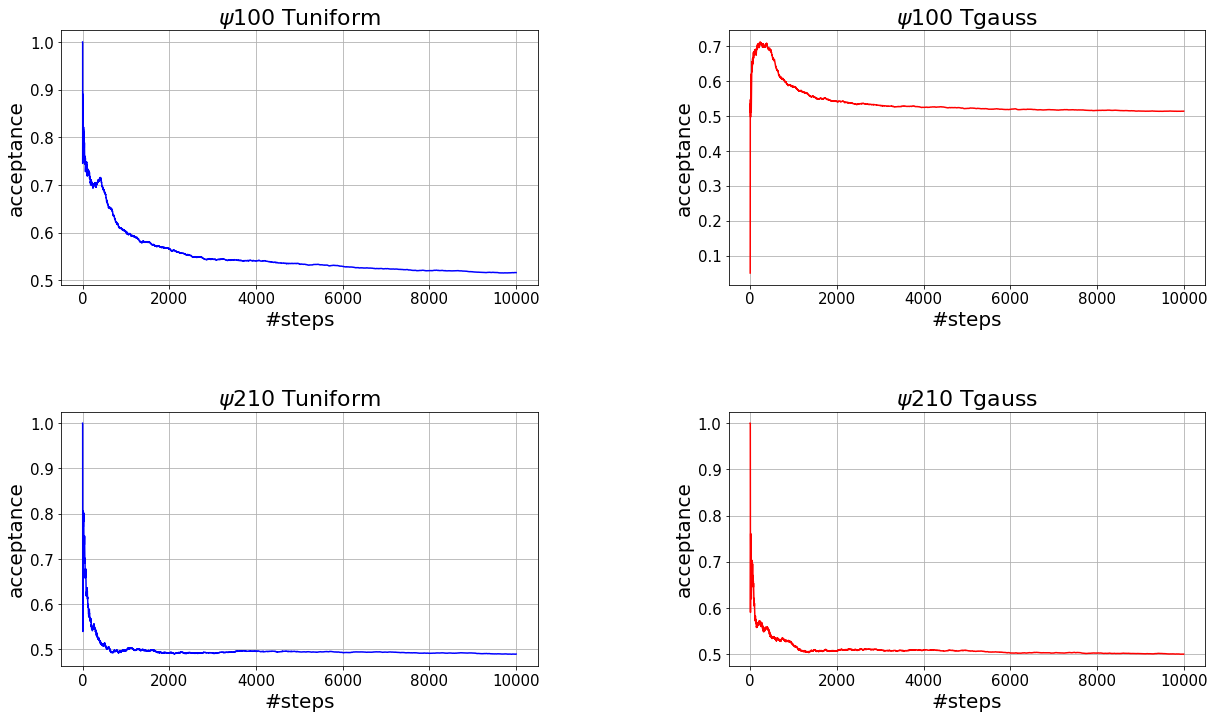

In [12]:
x_a=np.arange(np.asarray(ave_a_210_gauss_prog).size)
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(17, 12))

ax1.plot(x_a,ave_a_100_unif_prog, color='blue')
ax1.set_title(f'$\psi100$ Tuniform',  fontsize=22);
ax1.set_xlabel('#steps',fontsize=20)
ax1.set_ylabel('acceptance',fontsize=20)
ax1.tick_params(axis="x", labelsize=15)
ax1.tick_params(axis="y", labelsize=15)
ax1.grid(True)

ax2.plot(x_a,ave_a_100_gauss_prog, color='red')
ax2.set_title(f'$\psi100$ Tgauss',  fontsize=22);
ax2.set_xlabel('#steps',fontsize=20)
ax2.set_ylabel('acceptance',fontsize=20)
ax2.tick_params(axis="x", labelsize=15)
ax2.tick_params(axis="y", labelsize=15)
ax2.grid(True)

ax3.plot(x_a,ave_a_210_unif_prog, color='blue')
ax3.set_title(f'$\psi210$ Tuniform',  fontsize=22);
ax3.set_xlabel('#steps',fontsize=20)
ax3.set_ylabel('acceptance',fontsize=20)
ax3.tick_params(axis="x", labelsize=15)
ax3.tick_params(axis="y", labelsize=15)
ax3.grid(True)

ax4.plot(x_a,ave_a_210_gauss_prog, color='red')
ax4.set_title(f'$\psi210$ Tgauss',  fontsize=22);
ax4.set_xlabel('#steps',fontsize=20)
ax4.set_ylabel('acceptance',fontsize=20)
ax4.tick_params(axis="x", labelsize=15)
ax4.tick_params(axis="y", labelsize=15)
ax4.grid(True)


fig.tight_layout()
fig.subplots_adjust(top=0.8,hspace = 0.5,wspace = 0.4)

If the Markov chain starts far the point of maximum the acceptance converges slowly and the positions are very correlated until the metropolis bring them in an area of high probability density.

In [13]:
x_n_100_gauss_far = np.loadtxt(fname = "x_n_100_gauss_far.txt")
x_n_100_unif_far = np.loadtxt(fname = "x_n_100_unif_far.txt")

In [14]:
x_n_210_gauss_far = np.loadtxt(fname = "x_n_210_gauss_far.txt")
x_n_210_unif_far = np.loadtxt(fname = "x_n_210_unif_far.txt")

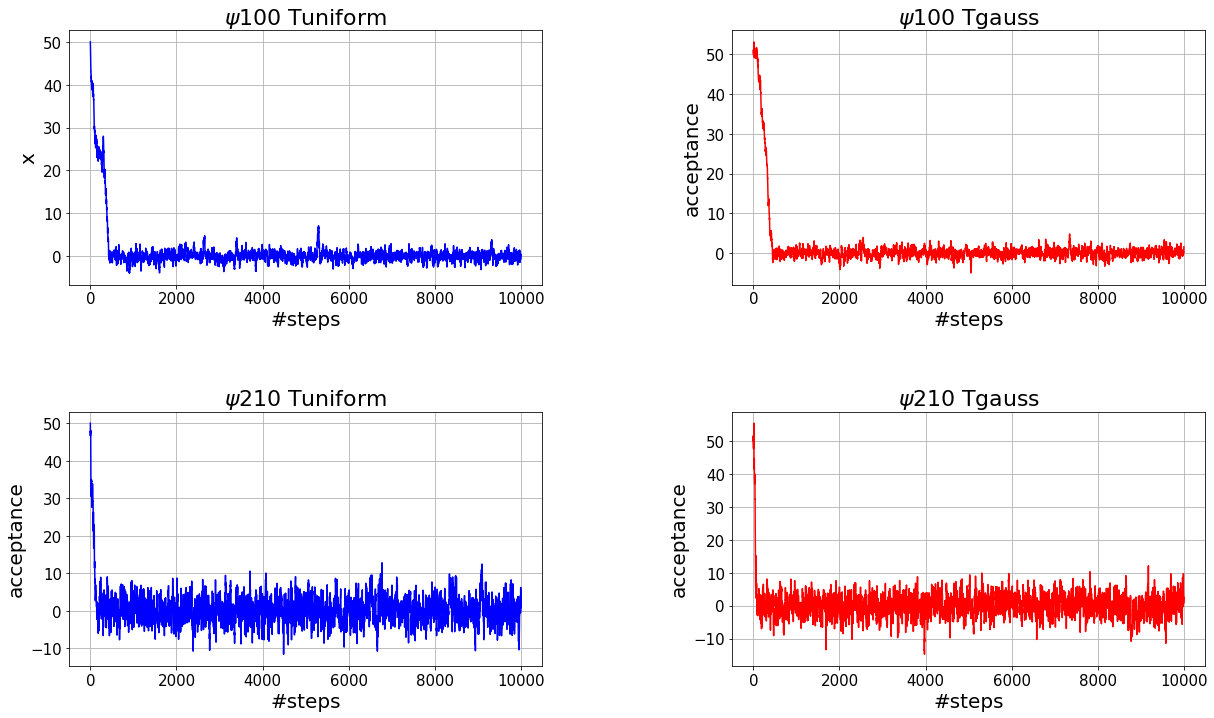

In [15]:
x_x=np.arange(np.asarray(x_n_210_gauss_far[:10000]).size)
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(17, 12))

ax1.plot(x_x,x_n_100_unif_far[:10000]/a_0, color='blue')
ax1.set_title(f'$\psi100$ Tuniform',  fontsize=22);
ax1.set_xlabel('#steps',fontsize=20)
ax1.set_ylabel('x',fontsize=20)
ax1.tick_params(axis="x", labelsize=15)
ax1.tick_params(axis="y", labelsize=15)
ax1.grid(True)

ax2.plot(x_x,x_n_100_gauss_far[:10000]/a_0, color='red')
ax2.set_title(f'$\psi100$ Tgauss',  fontsize=22);
ax2.set_xlabel('#steps',fontsize=20)
ax2.set_ylabel('acceptance',fontsize=20)
ax2.tick_params(axis="x", labelsize=15)
ax2.tick_params(axis="y", labelsize=15)
ax2.grid(True)

ax3.plot(x_x,x_n_210_unif_far[:10000]/a_0, color='blue')
ax3.set_title(f'$\psi210$ Tuniform',  fontsize=22);
ax3.set_xlabel('#steps',fontsize=20)
ax3.set_ylabel('acceptance',fontsize=20)
ax3.tick_params(axis="x", labelsize=15)
ax3.tick_params(axis="y", labelsize=15)
ax3.grid(True)

ax4.plot(x_x,x_n_210_gauss_far[:10000]/a_0, color='red')
ax4.set_title(f'$\psi210$ Tgauss',  fontsize=22);
ax4.set_xlabel('#steps',fontsize=20)
ax4.set_ylabel('acceptance',fontsize=20)
ax4.tick_params(axis="x", labelsize=15)
ax4.tick_params(axis="y", labelsize=15)
ax4.grid(True)


fig.tight_layout()
fig.subplots_adjust(top=0.8,hspace = 0.5,wspace = 0.4)

It is known that the sampling works correctly if the average acceptance is 50%, but the acceptance of the moves of Metropolis depends both from the transitional probability and the initial position. If the transitional probability makes the algorithm sufficiently ergodic the metroplois brings the markov chain in an area where the probablity distribuction is high. Indeed if you want an acceptance of 50% you must start your markov chain from a point near the maximum, otherwise the point of the algorithm are too correlated and the acceptance become larger than 50%. To overcome the possibility of choose a wrong initial position, the system must be equilibrated before taking the measurements.

The Images shown above display the graph of the acceptance and the graph of the x coordinate of the markov chain for two cases:
1. The markov chain starts near the point of maximum of the probability distribution.
2. The markov chain starts far from the point of maximum of the probability distribution: $x_0= 50 a_0$ for both the states.

The analysis made shows that the acceptance is slower in the convergence whan the markov chain stars far from the point of maximum beacause the metropolis brings the chian where the probability is high. In this transient phase the acceptance is high and the steps are too correlated to be taken as valid measurements. As a matter of fact, it can be seen from the graph of the position of the first coordinate that the values measured are far from the average value that we want to estimate.
Regarding all the considerations done has been decided in the c++ code a number of equilibration steps equal to $10^4$. 

In the simulations the number of steps is $10^6$ and the number of measures of $\left\langle r \right\rangle$ is $10^4$ divided in 100 blocks of 100 values. 

### Estimation of $\left\langle r \right\rangle_{\Psi_{1,0,0}}$

Picture of the estimation of $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and its uncertainties with a large number of *steps* $M = 10^7$ as a function of the number of blocks, $N=100$</font>.

In order to obtain an acceptance of 50%, in the first case has been chosen as T an unifrom probability in a cube of edge  $L=2.4a_0$ and in the second case has been chosen as T a normal distribution with $\sigma=0.75a_0$. 



In [16]:
 """uniform distribution"""
sum_prog_100_unif = np.loadtxt(fname = "ave_r_100_unif.txt")
err_prog_100_unif = np.loadtxt(fname = "err_r_100_unif.txt")

In [17]:
X_unif = np.loadtxt(fname = "x_n_100_unif.txt")
Y_unif = np.loadtxt(fname = "y_n_100_unif.txt")
Z_unif = np.loadtxt(fname = "z_n_100_unif.txt")

In [18]:
"""gauss distribution"""
sum_prog_100_gauss = np.loadtxt(fname = "ave_r_100_gauss.txt")
err_prog_100_gauss = np.loadtxt(fname = "err_r_100_gauss.txt")

In [19]:
X_gauss = np.loadtxt(fname = "x_n_100_gauss.txt")
Y_gauss = np.loadtxt(fname = "y_n_100_gauss.txt")
Z_gauss = np.loadtxt(fname = "z_n_100_gauss.txt")

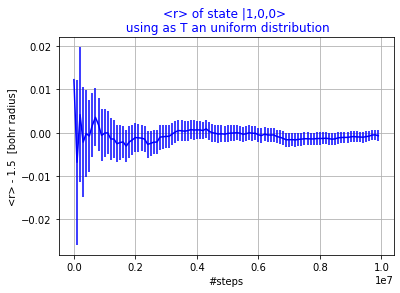

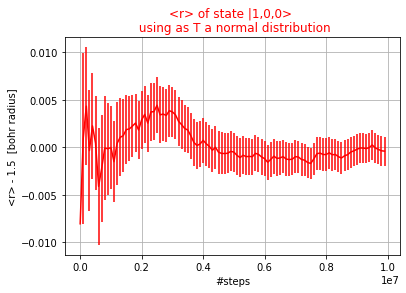

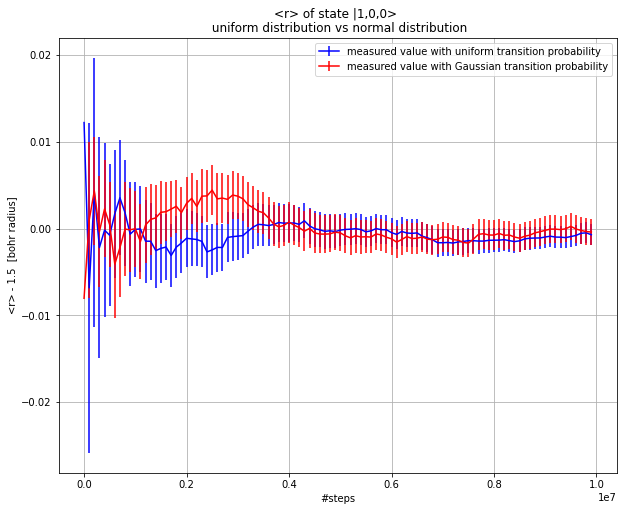

In [20]:

"""uniform distribution"""
      
plt.errorbar(x,sum_prog_100_unif-1.5,yerr=err_prog_100_unif, color='blue')
plt.xlabel('#steps')
plt.ylabel('<r> - 1.5  [bohr radius]')
plt.grid(True)
plt.title('<r> of state |1,0,0> \n using as T an uniform distribution', color='blue')
plt.show()



"""gauss distribution"""
      
plt.errorbar(x,sum_prog_100_gauss-1.5,yerr=err_prog_100_gauss, color='red')
plt.xlabel('#steps')
plt.ylabel('<r> - 1.5  [bohr radius]')
plt.grid(True)
plt.title('<r> of state |1,0,0> \n using as T a normal distribution', color='red')
plt.show()



plt.figure(figsize=(10, 8))
plt.errorbar(x,sum_prog_100_unif-1.5,yerr=err_prog_100_unif, label='measured value with uniform transition probability',color="blue")
plt.errorbar(x,sum_prog_100_gauss-1.5,yerr=err_prog_100_gauss, label='measured value with Gaussian transition probability',color="red")
plt.xlabel('#steps')
plt.ylabel('<r> - 1.5  [bohr radius]')
plt.title('<r> of state |1,0,0> \n uniform distribution vs normal distribution')
plt.grid(True)
plt.legend()

plt.show()

Here below a python cell with two plots of 1000 points of the markov chain built firstly with the uniform transition probability and secondly with the normal transition probability after the equilibration time.

Text(0.5, 0.92, 'RW points of state |1,0,0> \n using as T an gaussian distribution')

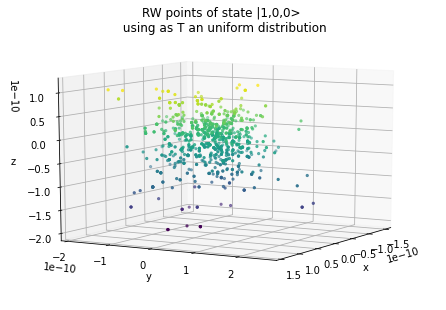

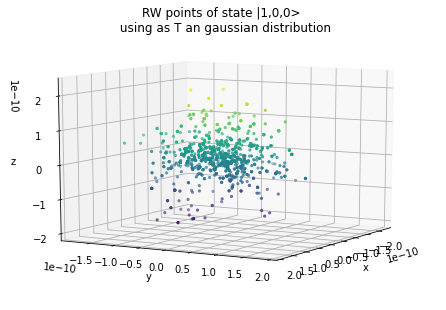

In [21]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_unif[19000:], Y_unif[19000:], Z_unif[19000:], c=Z_unif[19000:], marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
ax.set_title('RW points of state |1,0,0> \n using as T an uniform distribution')


fig = plt.figure()
plt.title('<r> of state |1,0,0> \n using as T a normal distribution', color='red')
ax = Axes3D(fig)
ax.scatter(X_gauss[19000:], Y_gauss[19000:], Z_gauss[19000:], c=Z_gauss[19000:], marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
ax.set_title('RW points of state |1,0,0> \n using as T an gaussian distribution')




As it can be seen from the two plots, the data of the markov chain extracted with the uniform transitional probability seems to be equivalent to the data extracted with the normal transitional probability.

The value of $\left\langle r \right\rangle$ is consistent with the gaussian distribution but not with the uniform distribution. The distance of the best estimation with the rel value is just a few $\sigma$, indeed it was not considered a problem and it can be affirmed that the sampling with this two different transitional probabilities is equivalent.



### Estimation of $\left\langle r \right\rangle_{\Psi_{2,1,0}}$

Picture of the estimation of $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ and its uncertaintie with a large number of *steps* $M = 10^7$ as a function of the number of blocks, $N$</font>.

In order to obtain an acceptance of 50%, in the first case has been chosen as T an unifrom probability in a cube of edge  $L=9a_0$ and in the second case has been chosen as T a normal distribution with $\sigma=2.75a_0$. 

In [22]:
"""uniform distribution"""
sum_prog_210_unif = np.loadtxt(fname = "ave_r_210_unif.txt")
err_prog_210_unif = np.loadtxt(fname = "err_r_210_unif.txt")

In [23]:
"""gauss distribution"""
sum_prog_210_gauss = np.loadtxt(fname = "ave_r_210_gauss.txt")
err_prog_210_gauss = np.loadtxt(fname = "err_r_210_gauss.txt")

In [24]:
X_210_unif = np.loadtxt(fname = "x_n_210_unif.txt")
Y_210_unif = np.loadtxt(fname = "y_n_210_unif.txt")
Z_210_unif = np.loadtxt(fname = "z_n_210_unif.txt")

In [25]:
X_210_gauss = np.loadtxt(fname = "x_n_210_gauss.txt")
Y_210_gauss = np.loadtxt(fname = "y_n_210_gauss.txt")
Z_210_gauss = np.loadtxt(fname = "z_n_210_gauss.txt")

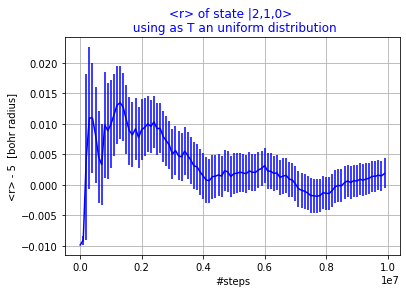

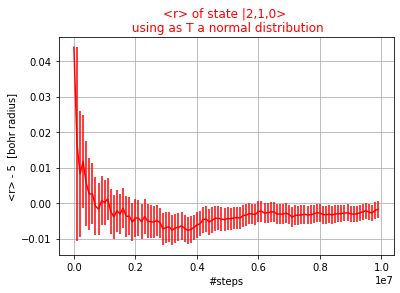

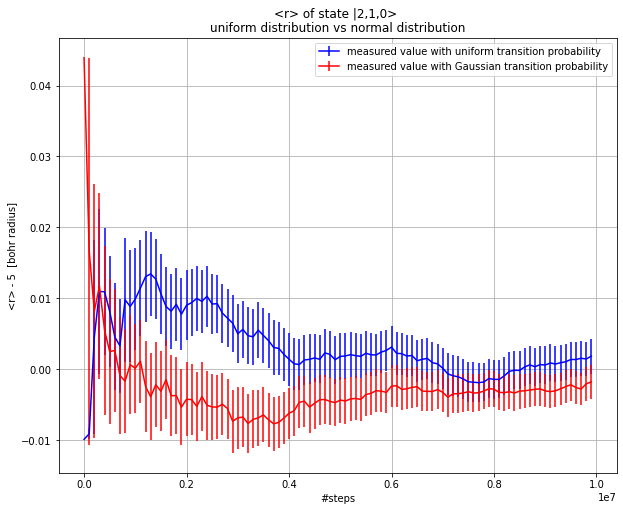

In [26]:

"""uniform distribution"""
      
plt.errorbar(x,sum_prog_210_unif-5,yerr=err_prog_210_unif, color='blue')
plt.xlabel('#steps')
plt.ylabel('<r> - 5  [bohr radius]')
plt.grid(True)
plt.title('<r> of state |2,1,0> \n using as T an uniform distribution', color='blue')
plt.show()



"""gauss distribution"""

      
plt.errorbar(x,sum_prog_210_gauss-5,yerr=err_prog_210_gauss, color='red')
plt.xlabel('#steps')
plt.ylabel('<r> - 5  [bohr radius]')
plt.grid(True)
plt.title('<r> of state |2,1,0> \n using as T a normal distribution', color='red')
plt.show()

plt.figure(figsize=(10, 8))
plt.errorbar(x,sum_prog_210_unif-5,yerr=err_prog_210_unif, label='measured value with uniform transition probability',color="blue")
plt.errorbar(x,sum_prog_210_gauss-5,yerr=err_prog_210_gauss, label='measured value with Gaussian transition probability',color="red")
plt.xlabel('#steps')
plt.ylabel('<r> - 5  [bohr radius]')
plt.title('<r> of state |2,1,0> \nuniform distribution vs normal distribution')
plt.grid(True)
plt.legend()

plt.show()

Here below a python cell with two plots of 1000 points of the markov chain built firstly with the uniform transition probability and secondly with the normal transition probability after the equilibration time.

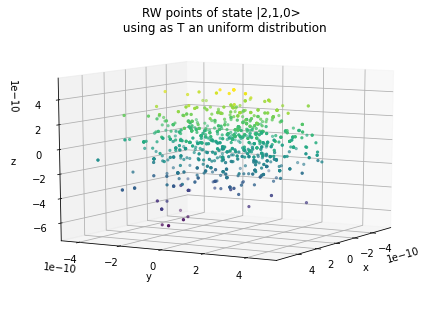

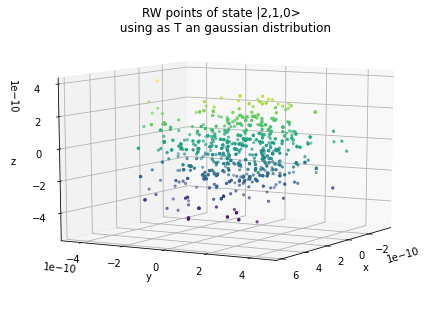

In [48]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_210_unif[19000:], Y_210_unif[19000:], Z_210_unif[19000:], c=Z_210_unif[19000:], marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
ax.set_title('RW points of state |2,1,0> \n using as T an uniform distribution')
plt.show()

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_210_gauss[19000:], Y_210_gauss[19000:], Z_210_gauss[19000:], c=Z_210_gauss[19000:], marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
ax.set_title('RW points of state |2,1,0> \n using as T an gaussian distribution')
plt.show()



As happens in the plots of the state |100>, the data of the markov chain extracted with the uniform transitional probability seems to be equivalent to the data extracted with the normal transitional probability. All the estimations are consistent with the analytical value.

